# Průměrování matice - rozostření 

## Vypracoval Marek Tremel roku 2024, F23211

### Zadání

- **Vstupní data**: Vámi zvolený obrázek
- **Grafické výstupy**: Vstupní obrázek a obrázek po průměrování. Porovnání rozostření obrázků pomocí 
Vašeho algoritmu a vestavěné funkce openCV. Časová závislost průměrování na velikosti matice 𝐵. 
Porovnání kvality průměrování mezi knihovnou openCV a Vaším algoritmem. 
 
  


- použité knihovny

In [77]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

## Tvorba manuálního rozostření

**Iterace  přes obrázek**
- ROI(body, které mě zajimají) 
    - pro každý pixel na pozici (i, j) se získá ROI o velikost *kernel_size*
    - `roi = padded_image[i:i+kernel_size, j:j+kernel_size]`
 vrací čtvercovou oblast (numpy.ndarray) s rozměry kernel_size x kernel_size kolem pixelu (i, j).
- Výpočet průměru ROI
    - `np.mean(roi, axis=(0, 1))` vypočítá průměrnou hodnotu v ROI.

In [78]:
def manual_blur(image, kernel_size):
    """Manuální implementace rozmazání obrazu.

    Args:
        image (numpy.ndarray): Obrázek k rozmazání.
        kernel_size (int): Velikost kernelu.

    Returns:
        numpy.ndarray: Rozmazaný obrázek.
    """
    # Získání rozměrů obrazu
    h, w = image.shape[:2]
    
    # Vytvoření pole pro rozmazaný obraz stejného typu jako vstupní obrázek
    blurred_image = np.zeros_like(image)
    
    # Okrajové zpracování obrázku pomocí cv2.copyMakeBorder
    padded_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REFLECT)
    
    # Průchod přes obrázek a aplikace rozmazání
    for i in range(h):
        for j in range(w):
            # Získání zajimavých bodů (ROI) o velikosti kernel_size x kernel_size
            roi = padded_image[i:i+kernel_size, j:j+kernel_size]
            
            # Vypočtení průměru hodnot v ROI a uložení do výsledného obrázku
            blurred_image[i, j] = np.mean(roi, axis=(0, 1))
    
    return blurred_image


# Načtení obrázku

In [79]:
image = cv2.imread('../assets/logo-roudnice.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Definování velikosti matice
- *v průběhu testování jsem došel k závěru, že *n* musí být vždy liché z důvodu rovnoměrnému rozostření*
- *n* definuje míru rozostření
- **Velikost jádra n (nebo také kernel_size) musí být vždy liché číslo při aplikaci průměrování (rozostření) obrazu z několika důvodů:**
    - Symetrie kolem pixelu
    - **Jednoznačnost středového pixelu**
    - Rovnoměrné rozostření


In [80]:
n = 3  # Velikost jádra
if n % 2 == 0:
    raise ValueError('Velikost jádra musí být liché číslo.')

## Zahájení měření a spuštění manuálného rozostření

In [81]:
# Měření času pro manuální průměrování
start_time = time.time()
manual_blurred_image = manual_blur(image, n)
manual_time = time.time() - start_time

## Vykonání vestavěného rozostření a změření

In [82]:
# Měření času pro Gaussův blur
start_time = time.time()
gaussian_blurred_image = cv2.GaussianBlur(image, (n, n), 0)
gaussian_time = time.time() - start_time



1. ### Zobrazení původního obrázku
- **Účel**: Ukázat původní vstupní obrázek pro finální demonstraci.
- **Implementace**: Původní obrázek (image) je zobrazen pomocí plt.imshow() v prvním subplotu (subplot(1, 4, 1)).
2. ### Zobrazení ručního rozostření
- **Účel**: Zobrazit obrázek po aplikaci ručního rozostření.
- **Implementace**:
Obrázek *manual_blurred_image*, získaný z funkce `manual_blur()`, je zobrazen ve druhém subplotu *(subplot(1, 4, 2))*.
3. ### Zobrazení Gaussova rozostření
- **Účel**: Zobrazit obrázek po aplikaci Gaussova rozostření pomocí OpenCV.
- **Implementace**:
Obrázek *gaussian_blurred_image*, získaný z funkce `cv2.GaussianBlur()`, je zobrazen ve třetím subplotu *(subplot(1, 4, 3))*.
4. ### Srovnání časů zpracování
- **Účel**: Porovnat časy zpracování mezi ručním a Gaussovým rozostřením.
- **Implementace**:
Sloupcový graf ve čtvrtém subplotu *(subplot(1, 4, 4))* porovnává čas potřebný pro ruční rozostření `manual_time` proti Gaussovu rozostření `gaussian_time`. Tímto způsobem je vizuálně znázorněna efektivita obou metod.

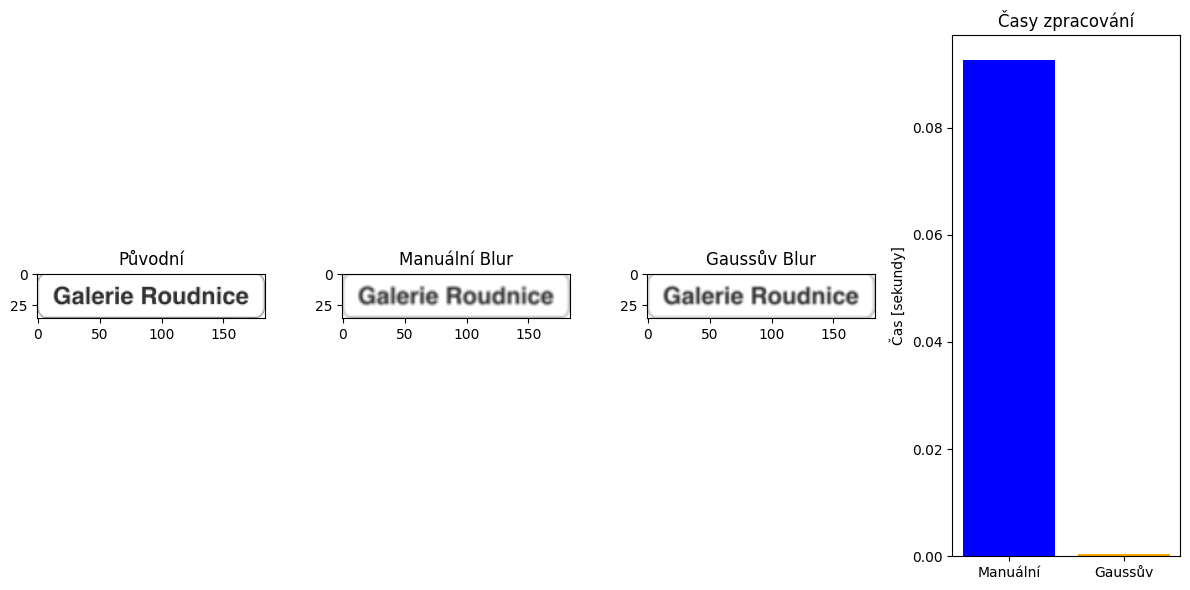

Čas pro manuální průměrování: 0.09260416030883789 sekund
Čas pro Gaussův blur: 0.000438690185546875 sekund


In [83]:
# Zobrazení výsledků
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(image)
plt.title('Původní')

plt.subplot(1, 4, 2)
plt.imshow(manual_blurred_image)
plt.title('Manuální Blur')

plt.subplot(1, 4, 3)
plt.imshow(gaussian_blurred_image)
plt.title('Gaussův Blur')

# Zobrazení časů
plt.subplot(1, 4, 4)
plt.bar(['Manuální', 'Gaussův'], [manual_time, gaussian_time], color=['blue', 'orange'])
plt.title('Časy zpracování')
plt.ylabel('Čas [sekundy]')

plt.tight_layout()
plt.show()

print(f"Čas pro manuální průměrování: {manual_time} sekund")
print(f"Čas pro Gaussův blur: {gaussian_time} sekund")

## Slovní ohodnocení
V rámci projektu zaměřeného na průměrování matice (rozostření) jsem se soustředil na implementaci a porovnání dvou metod: ručního průměrování a Gaussova rozostření v OpenCV.

První metoda použila manuálni iteraci přes každý pixel obrázku, kde se aplikoval průměr na okolní oblasti definované velikostí jádra *(n)*.

Gaussovo rozostření z OpenCV poskytlo výrazně lepší výsledky díky své matematicky založené váhování okolních pixelů. Kvalitativně dosahovalo výrazně hladších výsledků rozostření než ruční implementace.

V rámci hodnocení jsem také měřil časovou náročnost obou metod. OpenCv bylo podstatně výkonnejší, díky optimalizovanému algoritmu.

Projekt mi poskytl vhled do zpracování digitálního obrazu.

Literatura (zdroje)
1. Digital Image Processing Basics. Online. Dostupné z: https://www.geeksforgeeks.org/digital-image-processing-basics/. [cit. 2024-06-20].
2. Mastering Image Blurring in Python. Online. Dostupné z: https://cloudinary.com/guides/image-effects/mastering-image-blurring-in-python. [cit. 2024-06-20].
